In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', ',', error_bad_lines = False)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, sa

In [3]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
df.shape

(669640, 2)

In [5]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df_arr = np.array(df)
df_arr

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [8]:
import random
random.shuffle(df_arr)

In [9]:
X = [var[0] for var in df_arr]

In [10]:
y = [var[1] for var in df_arr]

<AxesSubplot:xlabel='strength', ylabel='count'>

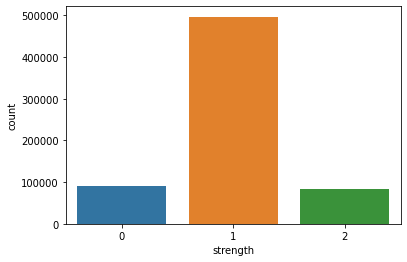

In [11]:
import seaborn as sns
sns.countplot(x = 'strength', data = df)

In [12]:
df.shape

(669639, 2)

In [13]:
def word_char(inp):
    input = []
    for chr in inp:
        input.append(chr)
    return input

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(tokenizer = word_char)
X = vector.fit_transform(X)

In [15]:
X.shape

(669639, 133)

In [16]:
feat_name = vector.get_feature_names()
first_document_vector=X[0]
first_document_vector

<1x133 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [17]:
new_df = pd.DataFrame(first_document_vector.T.todense(), index = feat_name, columns=['Tfidf'])

In [18]:
new_df.sort_values(by=["Tfidf"],ascending=False)

,Tfidf
7,0.591000
5,0.567595
z,0.335985
k,0.291650
d,0.285599
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [21]:
log_reg = LogisticRegression(penalty = 'l2', multi_class='ovr', solver='liblinear')

In [22]:
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [23]:
log_reg.score(X_train,y_train)

0.8118579958911737

In [24]:
log_reg.score(X_test,y_test)

0.8117595523963125

In [25]:
# Using Multinomial

log_reg_multi = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [26]:
log_reg_multi.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [27]:
log_reg_multi.score(X_train,y_train)

0.8189663080510382

In [28]:
log_reg_multi.score(X_test,y_test)

0.8189474941759751

In [29]:
log_mul = log_reg_multi.predict(X_test)

In [30]:
log_ovr = log_reg.predict(X_test)

In [31]:
x_predict = np.array(['@Abc/135'])
x_predict = vector.transform(x_predict)
y_pred = log_reg_multi.predict(x_predict)
y_pred

array([2])

#### XGBoost Classifier

In [32]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [33]:
xgb_class = xgb.XGBClassifier()

In [34]:
# Hyperparameter Tuning

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05', '0.1', '0.2', '0.3', '0.5']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 12)]
subsample = [0.6,0.7,0.8]
min_child_Weight = [3,4,5,6,7]

In [35]:
random_grid = {'n_estimators' : n_estimators,
               'learning_rate' : learning_rate,
               'max_depth' : max_depth,
               'subsample' : subsample,
               'min_child_Weight' : min_child_Weight
              }

In [36]:
xg_Random = RandomizedSearchCV(xgb_class,random_grid, cv = 3, n_iter = 2, verbose = 2, 
                               random_state = 0)

In [37]:
xg_Random.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.8, n_estimators=1100, min_child_Weight=3, max_depth=11, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:59] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:48:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, n_estimators=1100, min_child_Weight=3, max_depth=11, learning_rate=0.1, total=34.7min
[CV] subsample=0.8, n_estimators=1100, min_child_Weight=3, max_depth=11, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 34.7min remaining:    0.0s


[13:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, n_estimators=1100, min_child_Weight=3, max_depth=11, learning_rate=0.1, total=32.5min
[CV] subsample=0.8, n_estimators=1100, min_child_Weight=3, max_depth=11, learning_rate=0.1 
[13:55:07] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost c

KeyboardInterrupt: 

In [44]:
xg_Random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
xg_Random.best_score_

In [ ]:
xg_random_pred = xg_Random.predict(X_test)

In [ ]:
sns.distplot(y_test-xg_random_pred)

In [ ]:
sns.scatterplot(y_test,xg_random_pred)

In [ ]:
print('MAE:', mean_absolute_error(y_test, xg_random_pred))
print('MSE:', mean_squared_error(y_test, xg_random_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, xg_random_pred)))

In [ ]:
#### Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
multi_nb = MultinomialNB()

In [40]:
multi_nb.fit(X_train,y_train)

MultinomialNB()

In [41]:
y_pred = multi_nb.predict(X_test)

In [42]:
multi_nb.score(X_train,y_train)

0.7432175565923622

In [43]:
multi_nb.score(X_test,y_test)

0.7432600601318121